In [25]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
import numpy as np
import os
import cv2
import random
from matplotlib import pyplot as plt
# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score

In [118]:
def get_sample(data, N=300):
    # data = [[m,s],[m,s],[m,s], label]
    X = np.random.normal(*data[0], N)
    Y = np.random.normal(*data[1], N)
    Z = np.random.normal(*data[2], N)
    return np.array(list(zip(X,Y,Z)))

def determine(mean_vectors, max_distances, point):
    distances = np.array([np.linalg.norm(mv - point) - md for mv,md in zip(mean_vectors, max_distances)])
    min_idx = distances.argmin()
    if distances[min_idx] > 0:
        return -1
    return min_idx

def accuracy(result):
    idx = np.array([0,0,0,0,0])
    for e in result:
        idx[e] += 1
    label = np.argmax(idx)
    cnt = 0
    for e in result:
        if e == label:
            cnt += 1
    return cnt / len(result)

In [215]:
data = []
# data_load = True
data_load = False
if data_load and os.path.isfile("./hw15_data"):
    data = np.load("./hw15_data")
else:
    M = 20
    S = 2
    C = 5
    # X, Y, Z, label
    data = np.array([[
        [random.randint(0, M) ,abs(random.randint(1,S))],[random.randint(0, M) ,abs(random.randint(1,S))],[random.randint(0, M) ,abs(random.randint(1,S))], i
        ] for i in range(C)
    ])
    np.save("./hw15_data", data)

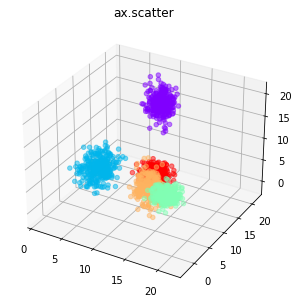

X : [9, 1], Y : [19, 1], Z : [15, 2], label : 0
X : [4, 1], Y : [9, 2], Z : [4, 2], label : 1
X : [19, 1], Y : [0, 1], Z : [10, 1], label : 2
X : [15, 1], Y : [3, 1], Z : [8, 2], label : 3
X : [12, 1], Y : [11, 1], Z : [5, 1], label : 4


In [216]:
points = get_sample(data[0])
for d in data[1:]:
    points = np.concatenate((points, get_sample(d)))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

d_p = points.T
label = [ i // 300 for i in range(len(points))]
ax.scatter(d_p[0], d_p[1], d_p[2], c =  label, alpha=0.5 ,s= 20, cmap=plt.cm.rainbow)
plt.title("ax.scatter")
plt.show()
for x, y, z, l in data:
    print("X : {}, Y : {}, Z : {}, label : {}".format(x,y,z,l))

In [217]:
K = 5
kmeans_clustering = KMeans(n_clusters=K, random_state=0).fit(points)
kmeans_cluster_points = [[] for i in range(K)]
for p, l in zip(points, kmeans_clustering.labels_):
    kmeans_cluster_points[l].append(p)
mean_vectors = [sum(kcp) / len(kcp) for kcp in kmeans_cluster_points]
max_distances = [0 for i in range(K)]
for p, l in zip(points, kmeans_clustering.labels_):
    distance = np.linalg.norm(p-mean_vectors[l])
    if max_distances[l] < distance:
        max_distances[l] = distance

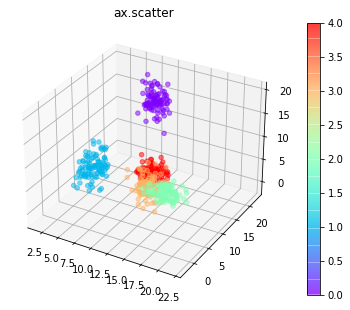

In [218]:
test_points = get_sample(data[0],N=100)
for d in data[1:]:
    test_points = np.concatenate((test_points, get_sample(d,N=100)))
 
d_p = test_points.T
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

label = [ i // 100 for i in range(len(test_points))]
cb = ax.scatter(d_p[0], d_p[1], d_p[2], c =  label, alpha=0.5 ,s= 20 , cmap=plt.cm.rainbow)
plt.colorbar(cb)
plt.title("ax.scatter")
plt.show()

In [219]:
det_label = []
for i in range(len(test_points)):
    det_label.append(determine(mean_vectors, max_distances, test_points[i]))

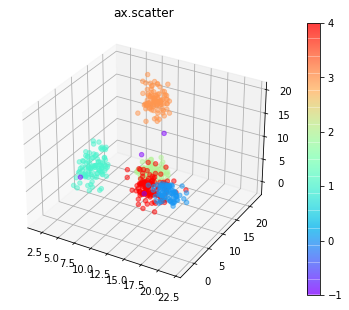

accuracy score : 0.895777712394797


In [220]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

cb = ax.scatter(d_p[0], d_p[1], d_p[2], c =  det_label, alpha=0.5 ,s= 20 , cmap=plt.cm.rainbow)
plt.colorbar(cb)
plt.title("ax.scatter")
plt.show()

print("accuracy score : {}".format(adjusted_rand_score(det_label, label)))